**Flower Multiclass Classification | VGG16**

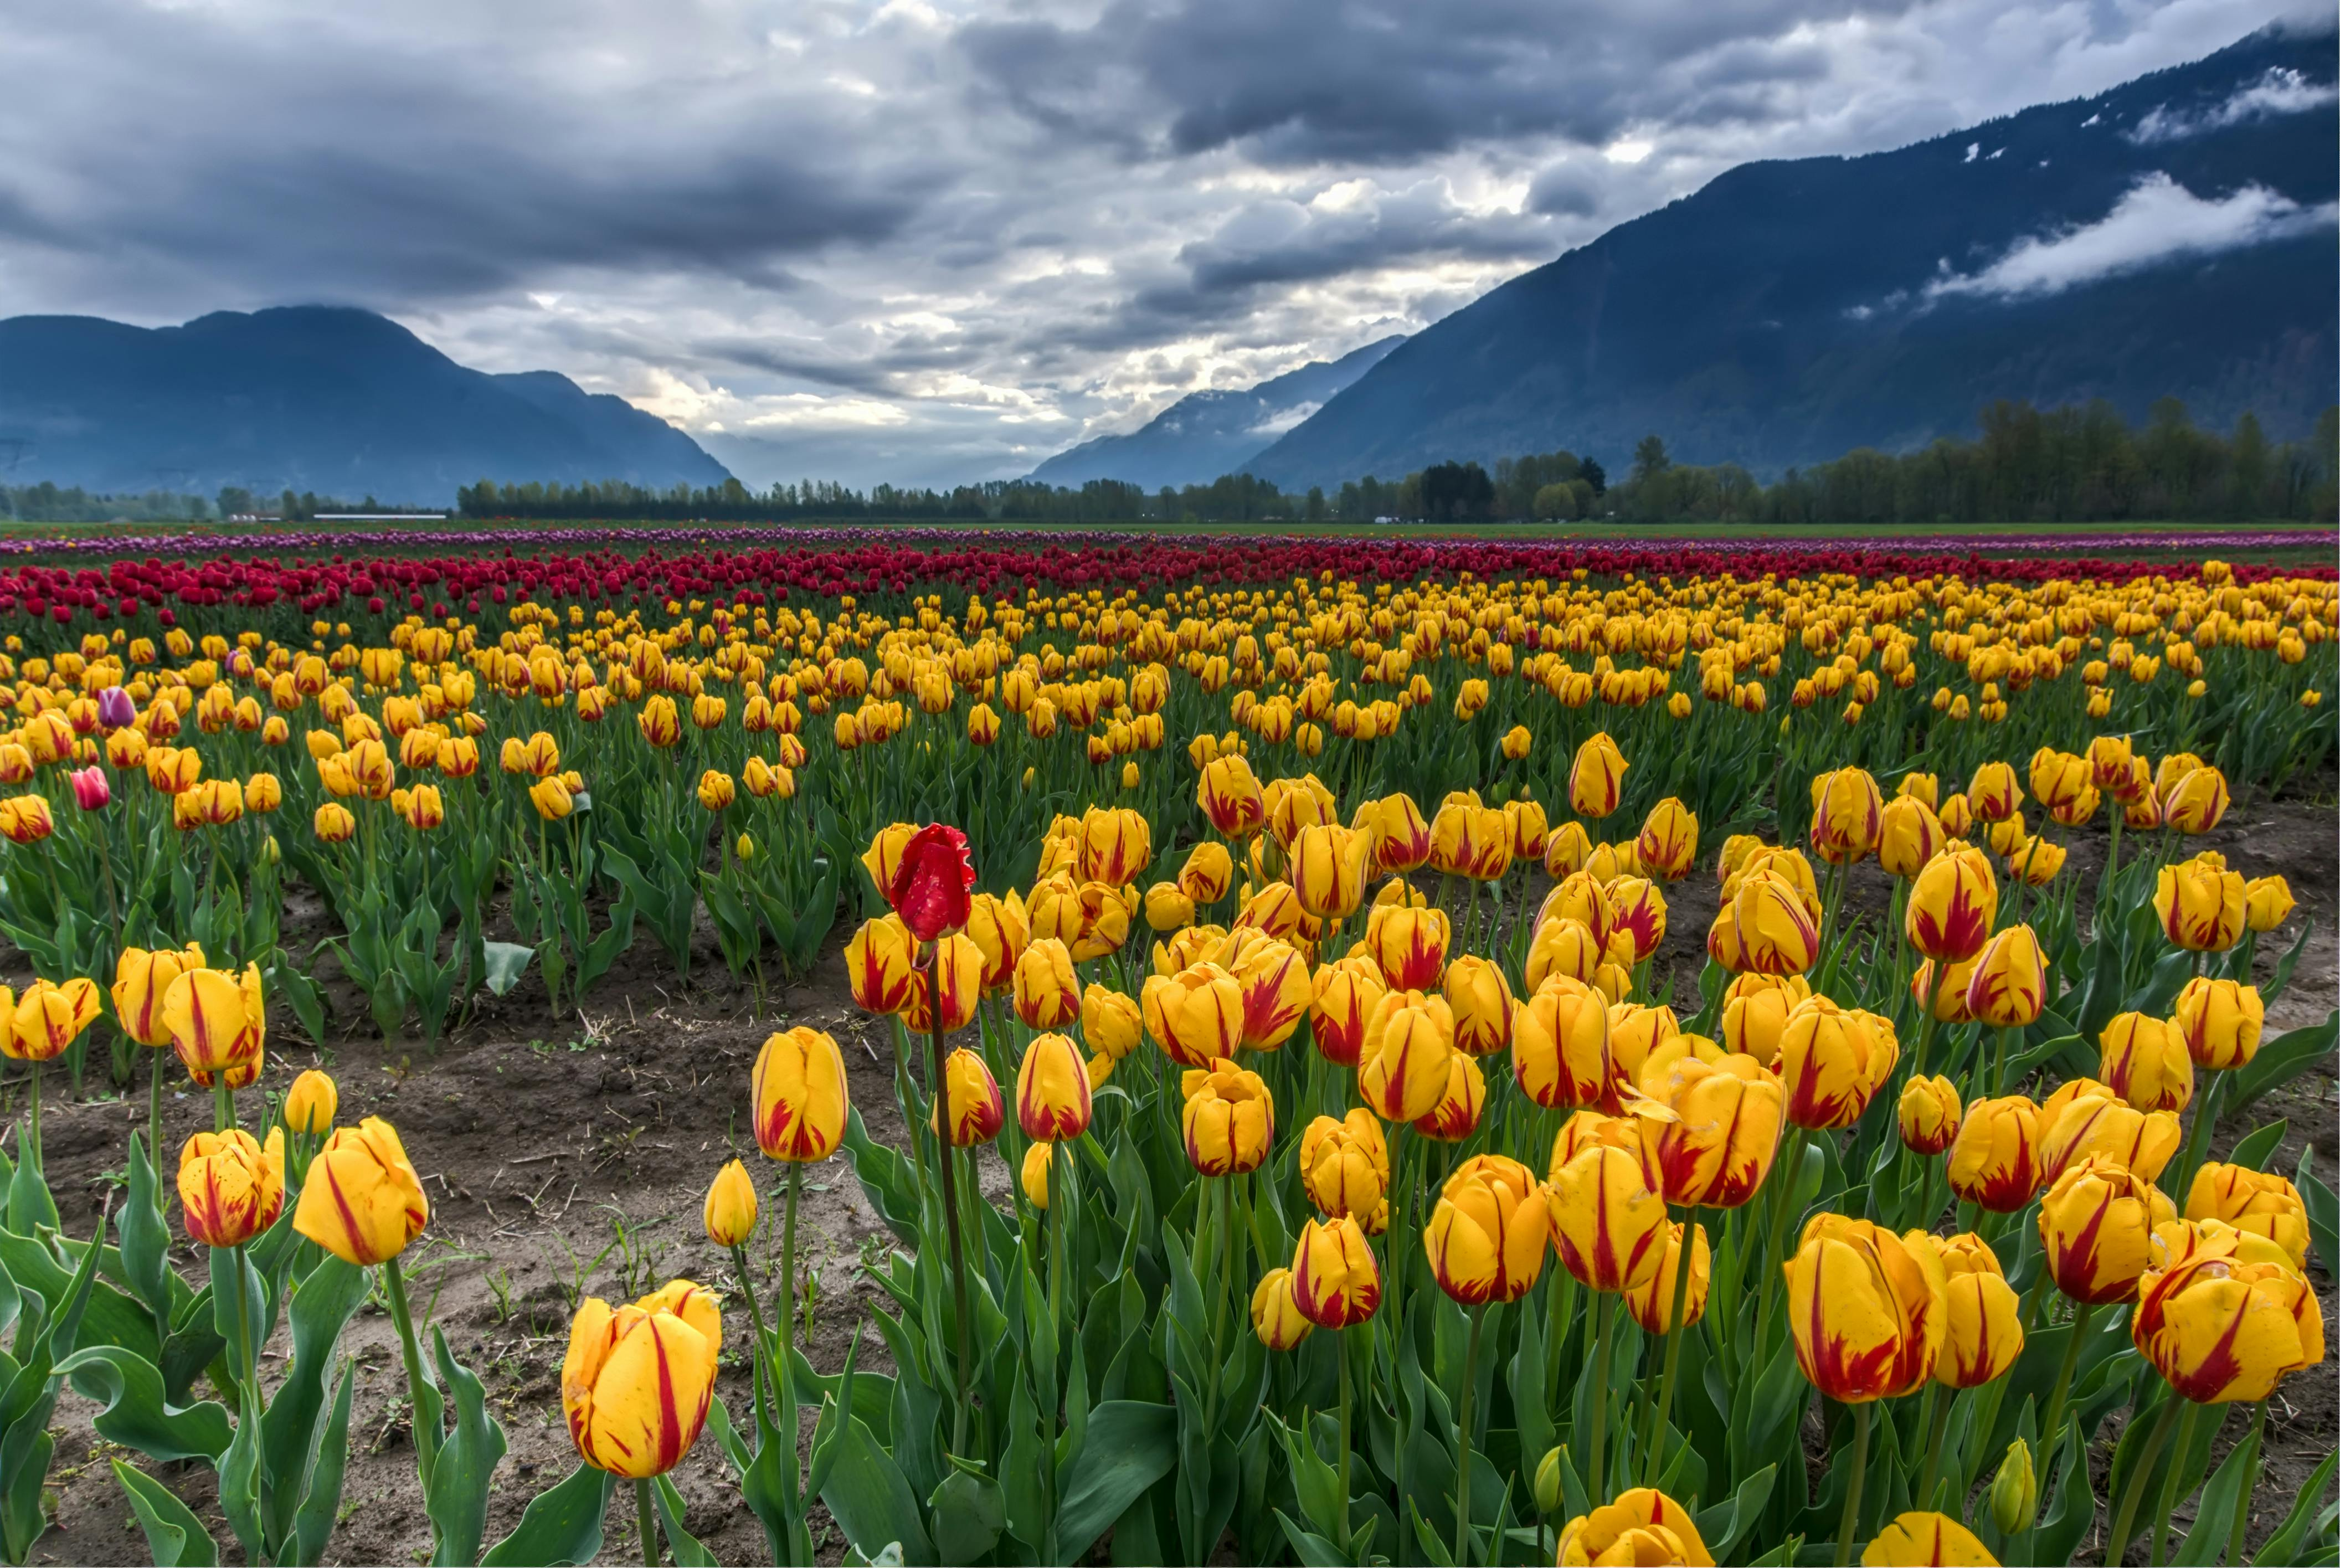

**Introduction to Image Classification with Transfer Learning**

Welcome to this notebook on image classification using transfer learning! In this notebook, we'll explore how to leverage transfer learning, a powerful technique in deep learning, to solve an image classification problem.

**About Transfer Learning :**

Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task. In the context of deep learning, transfer learning involves using a pre-trained neural network model as a starting point for a new task instead of training a model from scratch. This approach is particularly useful when working with limited data or computational resources.

**Objective :**

The objective of this notebook is to demonstrate how to use transfer learning to perform image classification on a dataset of flower images. We'll leverage a pre-trained convolutional neural network (CNN) as a feature extractor and build a custom classifier on top to predict the flower species.

**Dataset :**

We'll be using the "5 Flower Types Classification Dataset" available on Kaggle. This dataset contains images of five different types of flowers: Lily, Lotus, Orchid, Sunflower, and Tulip. Each image is labeled with its corresponding flower type.

Link to Dataset : https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

**Importing Libraries**

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
tensorflow.__version__

'2.17.0'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Building Model**

In [ ]:
base_model=VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable=False

In [ ]:
X=Flatten()(base_model.output)
pred=Dense(5,activation='softmax')(X)

In [ ]:
model=Model(inputs=base_model.input,outputs=pred)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,840,133 (56.61 MB)

 Trainable params: 125,445 (490.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Loading the data**

In [ ]:
trainpath='/content/drive/MyDrive/flower_dataset/train'
testpath='/content/drive/MyDrive/flower_dataset/test'
valpath='/content/drive/MyDrive/flower_dataset/validation'

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
trainset=train_datagen.flow_from_directory(trainpath,target_size=(224,224),batch_size=50,class_mode='categorical')
testset=test_datagen.flow_from_directory(testpath,target_size=(224,224),batch_size=50,class_mode='categorical')
valset=train_datagen.flow_from_directory(valpath,target_size=(224,224),batch_size=50,class_mode='categorical')

Found 4000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
earlystopping=EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

**Traing the Model**

In [ ]:
history=model.fit(trainset,validation_data=valset,epochs=50,callbacks=[earlystopping])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2577s 30s/step - accuracy: 0.4952 - loss: 1.4495 - val_accuracy: 0.8340 - val_loss: 0.5071
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 366ms/step - accuracy: 0.9177 - loss: 0.2978 - val_accuracy: 0.8840 - val_loss: 0.3968
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 382ms/step - accuracy: 0.9623 - loss: 0.1816 - val_accuracy: 0.9140 - val_loss: 0.2822
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 30s 354ms/step - accuracy: 0.9876 - loss: 0.1034 - val_accuracy: 0.8960 - val_loss: 0.3167
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 356ms/step - accuracy: 0.9895 - loss: 0.0792 - val_accuracy: 0.9280 - val_loss: 0.2383
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 359ms/step - accuracy: 0.9953 - loss: 0.0490 - val_accuracy: 0.9220 - val_loss: 0.2194
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 361ms/step - accuracy: 0.9974 - loss: 0.0413 - val_accuracy: 0.9380 - val_loss: 0.2093
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 359ms/step - accuracy: 0.9975 - loss: 0.0313 - val_accu

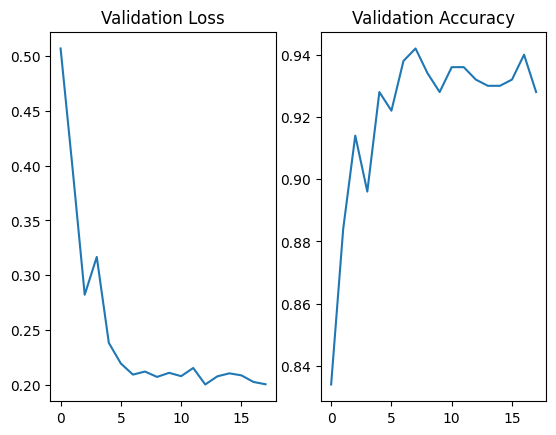

In [ ]:
# create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# plot val_loss
ax1.plot(history.history['val_loss'])
ax1.set_title('Validation Loss')

# plot val_accuracy
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Validation Accuracy')

# display the plot
plt.show()

In [ ]:
model.evaluate(testset)

10/10 ━━━━━━━━━━━━━━━━━━━━ 295s 33s/step - accuracy: 0.9226 - loss: 0.2496


[0.2540167272090912, 0.921999990940094]

In [ ]:
print(trainset.class_indices)

{'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}


**Predicting The Data**

2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 10s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


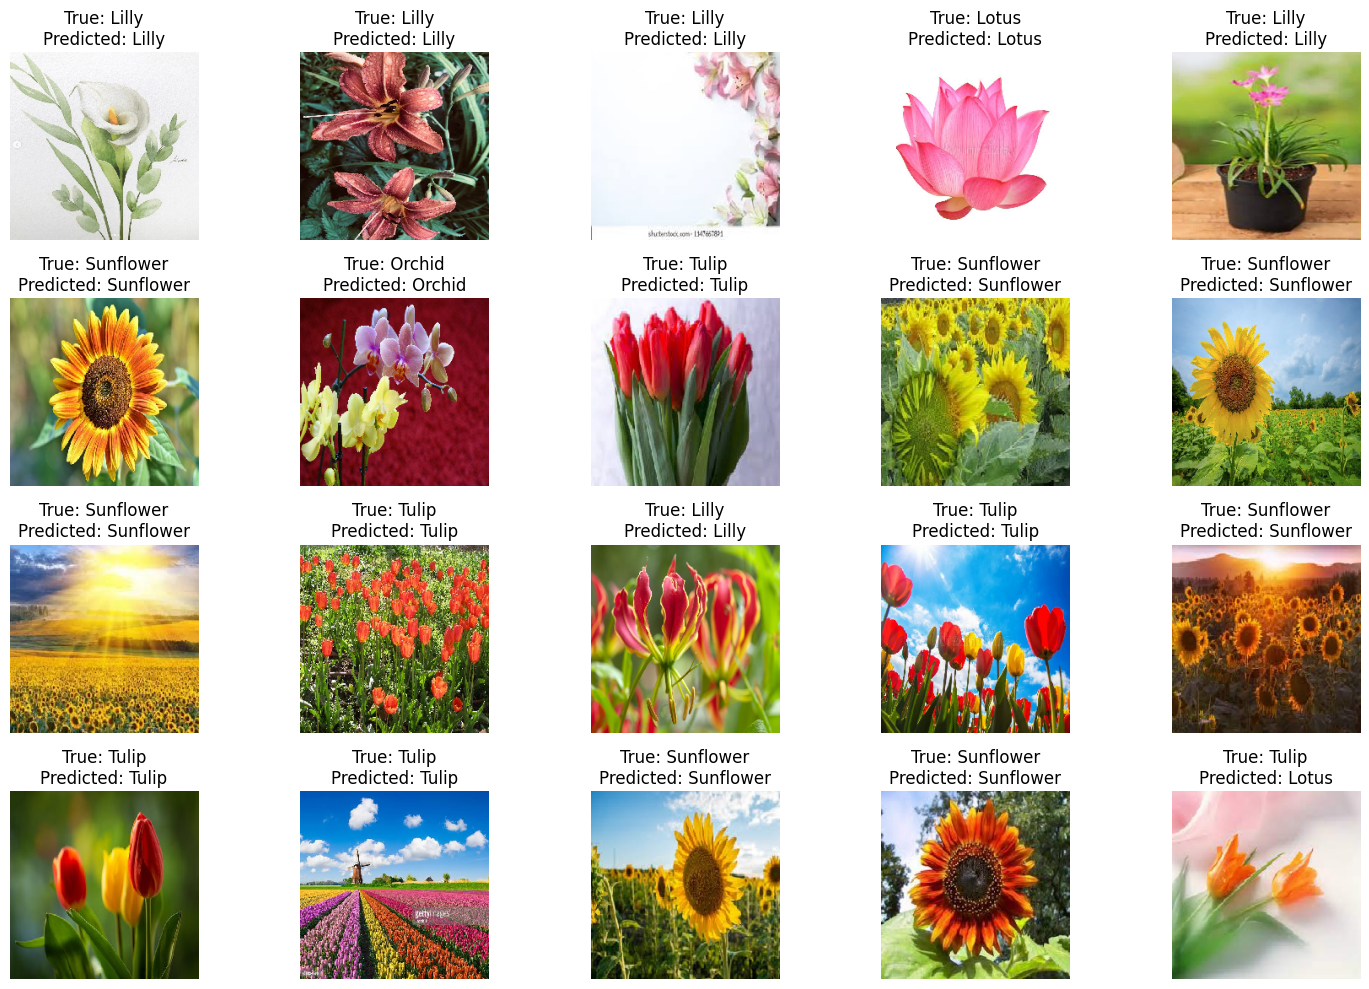

In [ ]:
class_labels = list(testset.class_indices.keys())
num_images = 20
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(testset)
    predictions = model.predict(image)

    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]

            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model.save('flower_multiclass_model.keras')